In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
base = automap_base()

# Use the Base class to reflect the database tables
base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and the station class to a variable called `Station`
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Calculate the most recent date in the dataset
recent_date_query = "SELECT date FROM measurement ORDER BY date DESC LIMIT 1;"
with engine.connect() as connection:
    recent_date = pd.read_sql_query(recent_date_query, connection)

# Extract the recent date from the DataFrame
most_recent_date = recent_date.iloc[0]['date']

print("Most recent date in the dataset:", most_recent_date)

Most recent date in the dataset: 2017-08-23


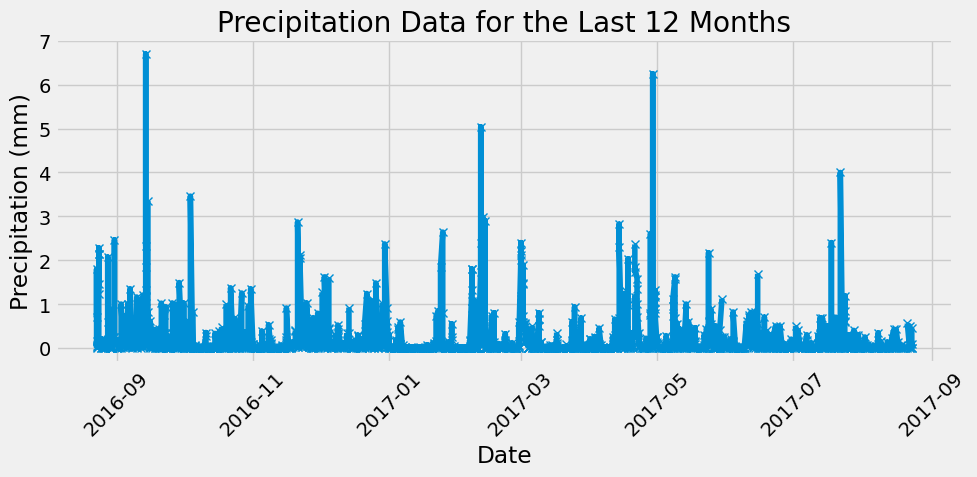

<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2230 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.3 KB


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Perform a query to retrieve the data and precipitation scores
query = """
SELECT date, prcp
FROM measurement
WHERE date >= DATE('2017-08-23', '-12 months')
ORDER BY date ASC
"""


with engine.connect() as connection:
    df = pd.read_sql_query(query, connection)

# Sort the dataframe by date
df.sort_values(by='date', inplace=True)

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['prcp'], marker='x')
plt.title('Precipitation Data for the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the DataFrame to check the column names
df.info()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,date,prcp
count,2230,2021.000000
mean,2017-02-16 05:31:15.874439424,0.177279
min,2016-08-23 00:00:00,0.000000
25%,2016-11-18 00:00:00,0.000000
50%,2017-02-14 12:00:00,0.020000
75%,2017-05-17 00:00:00,0.130000
max,2017-08-23 00:00:00,6.700000
std,NaN,0.461190


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_query = """
SELECT COUNT(*) AS total_stations
FROM station
"""

with engine.connect() as connection:
    df2 = pd.read_sql_query(station_query, connection)
    print(df2)


   total_stations
0               9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station_query = """
SELECT s.station, s.name, COUNT(m.station) AS station_count
FROM measurement m
JOIN station s ON m.station = s.station
GROUP BY s.station
ORDER BY station_count DESC
"""

with engine.connect() as connection:
    df3 = pd.read_sql_query(active_station_query, connection)
    print(df3)

       station                                    name  station_count
0  USC00519281                     WAIHEE 837.5, HI US           2772
1  USC00519397                    WAIKIKI 717.2, HI US           2724
2  USC00513117                    KANEOHE 838.1, HI US           2709
3  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US           2669
4  USC00516128            MANOA LYON ARBO 785.2, HI US           2612
5  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US           2202
6  USC00511918       HONOLULU OBSERVATORY 702.2, HI US           1979
7  USC00517948                       PEARL CITY, HI US           1372
8  USC00518838              UPPER WAHIAWA 874.3, HI US            511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_query = """
SELECT s.station, s.name, COUNT(m.station) AS station_count, MIN(m.tobs) AS min_temp, MAX(m.tobs) AS max_temp, AVG(m.tobs) AS avg_temp
FROM measurement m
JOIN station s ON m.station = s.station
GROUP BY s.station
ORDER BY station_count DESC
"""

with engine.connect() as connection:
    df4 = pd.read_sql_query(temp_query, connection)
    print(df4)

       station                                    name  station_count  \
0  USC00519281                     WAIHEE 837.5, HI US           2772   
1  USC00519397                    WAIKIKI 717.2, HI US           2724   
2  USC00513117                    KANEOHE 838.1, HI US           2709   
3  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US           2669   
4  USC00516128            MANOA LYON ARBO 785.2, HI US           2612   
5  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US           2202   
6  USC00511918       HONOLULU OBSERVATORY 702.2, HI US           1979   
7  USC00517948                       PEARL CITY, HI US           1372   
8  USC00518838              UPPER WAHIAWA 874.3, HI US            511   

   min_temp  max_temp   avg_temp  
0      54.0      85.0  71.663781  
1      56.0      87.0  74.553231  
2      59.0      85.0  72.689184  
3      56.0      85.0  74.543649  
4      58.0      84.0  70.915008  
5      58.0      85.0  74.873297  
6      53.0      87.0  7

     tobs      station
0    77.0  USC00519281
1    77.0  USC00519281
2    80.0  USC00519281
3    80.0  USC00519281
4    75.0  USC00519281
..    ...          ...
347  77.0  USC00519281
348  77.0  USC00519281
349  76.0  USC00519281
350  76.0  USC00519281
351  79.0  USC00519281

[352 rows x 2 columns]


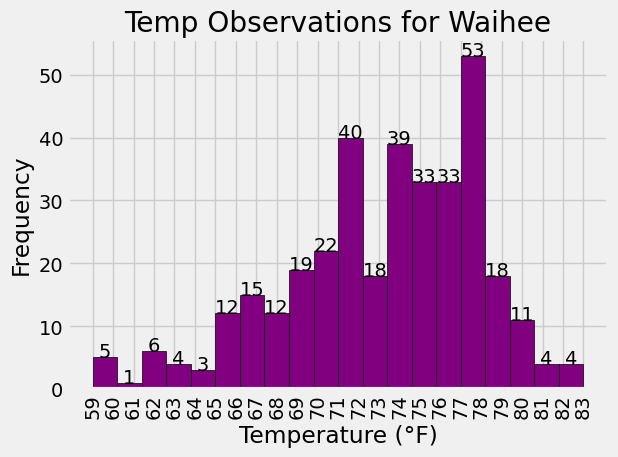

,tobs
count,352.000000
mean,73.107955
std,4.733315
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

plot_query = """
SELECT m.tobs, m.station
FROM measurement m
WHERE m.station = 'USC00519281' 
AND m.date >= DATE('2017-08-23', '-12 months')
"""

with engine.connect() as connection:
    df5 = pd.read_sql_query(plot_query, connection)
    print(df5)

# Histogram
counts, bins = np.histogram(df5['tobs'], bins=20)
plt.hist(df5['tobs'], bins=20, edgecolor='black', color='purple')
plt.title('Temp Observations for Waihee')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')

# Set x-ticks to display individual temperature values
unique_temperatures = np.unique(df5['tobs'])  # Get unique temperature values
plt.xticks(unique_temperatures, rotation=90)  # Set ticks and rotate them if needed

# Set numbers at top
for count, x in zip(counts, bins[:-1]):
    plt.annotate(f'{int(count)}', xy=(x + (bins[1] - bins[0]) / 2, count), ha='center')

plt.tight_layout()
plt.show()

df5.describe()

# Close Session

In [16]:
# Close Session
session.close()
